In [80]:
!pip install pytrends

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
df = pd.read_csv('updated_givingSG_campaign_details.csv')
df.head()

,CampaignId,CampaignTitle,CharityName,AboutCampaign,AboutCharity,Cleaned_AboutCampaign,Top_Keywords
0,3701156,365 is the code you need to GIFT help,Children-At-Risk Empowerment Association (CARE...,What struggles lie behind the face? CARE Sing...,"Established in 1997, Children-At-Risk Empowerm...",struggle lie behind face care singapore work m...,"['issue', 'urgent', '18', 'suicide', 'helpline']"
1,3749727,You can HELP,Children-At-Risk Empowerment Association (CARE...,You alone have the power to decide what your d...,"Established in 1997, Children-At-Risk Empowerm...",alone power decide donation help many people h...,"['help', 'child', 'working', 'power', 'step']"
2,3749688,LKH's Inaugural Virtual Fundraising Flag Day,Ling Kwang Home for Senior Citizens,I am Edwin and have been totally blind since b...,Ling Kwang Home for Senior Citizens (LKHSC) is...,edwin totally blind since birth thankful god m...,"['kwang', 'ling', 'cost', 'virtual', 'home']"
3,3749675,Help families...,Children-At-Risk Empowerment Association (CARE...,$365 or $1 a day can allow support for student...,"Established in 1997, Children-At-Risk Empowerm...",365 1 day allow support student need donate 10...,"['allow', 'love', 'donate', 'sure', 'need']"
4,2405227,Help use music to heal..,Children-At-Risk Empowerment Association (CARE...,Supporting samba masala... Samba Masala is co...,"Established in 1997, Children-At-Risk Empowerm...",supporting samba masala ... samba masala colla...,"['money', 'care', 'singapore', '2024', 'helping']"


In [ ]:
import re

df['CharityName'][4]
def clean_charity_name(name):
    # Remove brackets and content inside
    name = re.sub(r'\(.*?\)', '', name.lower())
    # Replace '-' with ' '
    name = name.replace('-', ' ')
    name = name.replace('ltd', '')
    # remove word that ends with .
    name = re.sub(r'\b\w+\.', '', name)
    return name.strip()

distinct_charity_names = df['CharityName'].apply(clean_charity_name).unique()
print(distinct_charity_names)

['children at risk empowerment association'
 'ling kwang home for senior citizens' 'friends of the disabled society'
 'cheng hong welfare service society' 'mercy relief'
 'shine children and youth services' 'brahm centre' 'teen challenge'
 'singhealth fund   singhealth polyclinics' 'hope worldwide'
 'the straits times school pocket money fund' 'singapore canoe federation'
 'singapore heart foundation' "o'joy limited" 'blossom world society'
 'society for the prevention of cruelty to animals' 'cat welfare society'
 'deaf sports association' 'the necessary stage'
 'mental health film festival  limited' 'community chest' 'assisi hospice'
 'etonhouse community fund limited' 'waterways watch society'
 'singapore red cross society' 'singapore cancer society'
 "children's charities association" 'free food for all limited'
 "children's wishing well" 'bartley community care services  limited'
 'sosd' 'home nursing foundation' 'the national kidney foundation'
 'sata commhealth' 'youthline' 'daru

In [75]:
saved_charity_names_df = pd.read_csv('charity_trend.csv')
distinct_saved_names = saved_charity_names_df['CharityName'].unique()

In [68]:
distinct_saved_names


array(['children at risk empowerment association',
       'ling kwang home for senior citizens',
       'cheng hong welfare service society', 'mercy relief',
       'shine children and youth services', 'brahm centre',
       'teen challenge', 'the straits times school pocket money fund',
       'singapore canoe federation', 'singapore heart foundation',
       'blossom world society', 'cat welfare society',
       'the necessary stage'], dtype=object)

See API Responses

Import pytrends to call google trends API

In [6]:
from pytrends.request import TrendReq
pytrends = TrendReq()


Find interest over time based on keywords

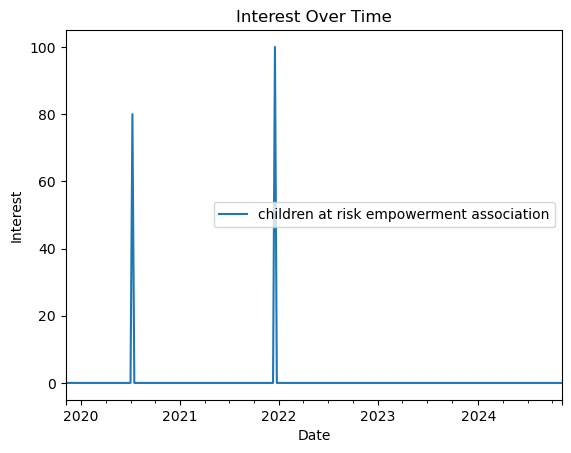

In [8]:
pytrends.build_payload([distinct_charity_names[0]], cat=0, timeframe='today 5-y', geo='SG', gprop='')
interest_over_time = pytrends.interest_over_time()

if not interest_over_time.empty:
    interest_over_time.plot()
    plt.title('Interest Over Time')
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.show()
else:
    print("The interest_over_time dataframe is empty.")

In [ ]:
import time
charity_trend = []
# remove from distinct_saved_names the names that are already in the distinct_saved_names
distinct_charity_names = np.setdiff1d(distinct_charity_names, distinct_saved_names)

for i in distinct_charity_names:
    try: 
        pytrends.build_payload([i], cat=0, timeframe='today 5-y', geo='SG', gprop='')
        interest_over_time = pytrends.interest_over_time()

        if not interest_over_time.empty:
            interest_over_time = interest_over_time[interest_over_time.iloc[:, 0] != 0]
            interest_over_time_json = interest_over_time.to_dict()
            for keys in interest_over_time_json[i].keys():
                charity_trend.append({
                    'CharityName': i,
                    'Date': keys,
                    'Interest': interest_over_time_json[i][keys]
                })
           
        else:
            print(i + " is empty.")
            charity_trend.append({
                    'CharityName': i,
                    'Date': 'null',
                    'Interest': 'null'
                })
        
        time.sleep(5)

    except Exception as e:
        print(e + " for " + i)
        continue

TypeError: unsupported operand type(s) for +: 'TooManyRequestsError' and 'str'

In [79]:
charity_trend

[]

In [78]:
# Convert the charity_trend list to a DataFrame
charity_trend_df = pd.DataFrame(charity_trend)

# Save the DataFrame to a CSV file
charity_trend_df.to_csv('charity_trend.csv', index=False)